In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
df=pd.read_csv("train.csv",parse_dates=[1])
#df=pd.read_csv("train.csv")

In [111]:
df_test=pd.read_csv("test.csv",parse_dates=[1])

In [112]:
df_test.columns[df_test.isnull().any()]

Index(['X_12'], dtype='object')

In [113]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [6]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   INCIDENT_ID       23856 non-null  object        
 1   DATE              23856 non-null  datetime64[ns]
 2   X_1               23856 non-null  int64         
 3   X_2               23856 non-null  int64         
 4   X_3               23856 non-null  int64         
 5   X_4               23856 non-null  int64         
 6   X_5               23856 non-null  int64         
 7   X_6               23856 non-null  int64         
 8   X_7               23856 non-null  int64         
 9   X_8               23856 non-null  int64         
 10  X_9               23856 non-null  int64         
 11  X_10              23856 non-null  int64         
 12  X_11              23856 non-null  int64         
 13  X_12              23674 non-null  float64       
 14  X_13              2385

In [8]:
df.dtypes.value_counts()

int64             15
float64            1
datetime64[ns]     1
object             1
dtype: int64

In [9]:
df_org=df.copy()

In [10]:
from sklearn.impute import SimpleImputer

In [114]:
SI=SimpleImputer()

In [115]:
SI.fit(df[['X_12']])

SimpleImputer()

In [116]:
df['X_12']=SI.transform(df[['X_12']])

In [117]:
df_test['X_12']=SI.transform(df_test[['X_12']])

In [118]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [16]:
def summary(df):
    columns1=list([df.columns])
    unique_values=[]
    null_values=[]
    
    for col in df.columns:
        unique_values.append(df[col].nunique())
        null_values.append(df[col].isnull().sum())
        
    df_summary=pd.DataFrame([columns1,unique_values,null_values],columns=['col_name,unique_val,null_val'])
    return df_summary

In [17]:
#df_summary=summary(df)

In [119]:
X=df.drop(columns=['DATE','MULTIPLE_OFFENSE','INCIDENT_ID'],axis=1)

In [120]:
X=X.astype('float64')

In [121]:
test_inident_id=df_test['INCIDENT_ID']

In [122]:
df_test=df_test.drop(columns=['DATE','INCIDENT_ID'])

In [123]:
df_test=df_test.astype('float64')

In [124]:
y=df['MULTIPLE_OFFENSE']

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [126]:
ss=StandardScaler()
ss.fit(X)
X_cols=list(X.columns)
X=ss.transform(X)

In [127]:
X

array([[-0.33602492,  0.73548947,  0.61861178, ...,  0.24505213,
        -1.00872781,  0.30229601],
       [ 0.35856051,  0.80110665,  0.81683078, ...,  0.64365126,
         1.60118818,  0.06382199],
       [-0.33602492, -1.42987743, -1.4957242 , ...,  0.89730526,
         0.46945469,  0.06382199],
       ...,
       [-0.33602492,  0.0137005 ,  0.02395479, ..., -2.72632324,
        -1.00872781, -1.84397015],
       [-0.33602492,  0.932341  ,  0.94897678, ...,  0.96977783,
         0.70042071,  1.13695506],
       [ 4.52607309,  0.73548947,  0.61861178, ...,  0.24505213,
        -1.00872781,  0.06382199]])

In [128]:
ss_test=StandardScaler()
ss_test.fit(df_test)
df_cols=list(df.columns)
df_test=ss_test.transform(df_test)
#df_test=ss.transform(df_test)

In [129]:
df_test

array([[-0.33149102,  0.3465487 ,  0.68916296, ..., -0.47981008,
         1.07699829, -1.25362   ],
       [-0.33149102,  1.26588593,  1.28412657, ..., -2.66223712,
        -0.99497464,  0.06944597],
       [-0.33149102,  0.60921648,  0.55694882, ..., -0.47981008,
        -1.66261037,  0.06944597],
       ...,
       [-0.33149102,  0.08388092,  0.16030642, ..., -0.47981008,
        -0.23525123,  0.06944597],
       [-0.33149102, -0.2444538 , -0.10412185, ...,  0.2476656 ,
        -0.23525123,  0.06944597],
       [-0.33149102, -1.36079186, -1.36015614, ..., -0.47981008,
        -0.99497464,  0.06944597]])

In [130]:
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X,y)

In [131]:
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [X.shape[0],X.shape[1]])

In [132]:
X_noise=X+noise

In [133]:
X_noise_train,X_noise_test,X_train_enc,X_test_enc=train_test_split(X_noise,X,test_size=.2)

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
#X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=.5)

In [135]:
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=.5)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_test_predict=rfc.predict(X_test)

In [34]:
from sklearn.metrics import recall_score

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
#XGB_model=Grid_XGB.best_estimator_

In [37]:
def GridSearchXGBC(X_train,y_train,lr=.3,trees=50,cv=10):
    #XGB_classifier_param={'learning_rate':learning_rate_val,'subsample':subsample_val,'colsample_bytree':colsample_bytree_val}
    base_XGBC=XGBClassifier(objective='binary:logistic',eval_metric='auc',booster='gbtree',n_estimators=trees,silent=0,learning_rate=lr,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=1)
    #max_depth_val=[100]
    max_depth_val=[10,30,50,70,90,20]
    #min_child_weight_val=[1]
    min_child_weight_val=[1,2,4,8] #equivalent of min_child_leaf in GBM
    #eta=learning_rate
    first_tuning={'max_depth':max_depth_val,'min_child_weight':min_child_weight_val}
    grid_model=GridSearchCV(estimator=base_XGBC,param_grid=first_tuning,cv=cv)
    grid_model.fit(X_train,y_train)
    #learning-rate=2-10/num of trees
    learning_rate_val=[.2,.1,.05,.02,.01]
    #learning_rate_val=[.2,.1]
    n_estimators_val=[50,100,200,400,500,800,1000]
    #n_estimators_val=[100,200]
    second_tuning={'learning_rate':learning_rate_val,'n_estimators':n_estimators_val}
    final_model=GridSearchCV(estimator=grid_model.best_estimator_,param_grid=second_tuning,cv=cv)
    final_model.fit(X_train,y_train)
    return final_model

In [38]:
Grid_XGB=GridSearchXGBC(X_train,y_train,cv=3)

In [39]:
XGB_model=Grid_XGB.best_estimator_

In [40]:
XGB_model.fit(X_train,y_train)

XGBClassifier(eval_metric='auc', learning_rate=0.05, max_delta_setp=0,
              max_depth=30, n_estimators=800, silent=0)

In [41]:
XGB_pred=XGB_model.predict(df_test)

In [42]:
y_upload=rfc.predict(df_test)

In [43]:
X_train

array([[-0.33602492, -0.44561975, -0.43855621, ...,  0.64365126,
         1.60118818,  0.06382199],
       [-0.33602492,  0.99795818,  1.01504978, ...,  0.64365126,
         0.46945469,  0.06382199],
       [-0.33602492,  1.2604269 ,  1.27934178, ..., -1.8566524 ,
        -1.00872781, -3.9902363 ],
       ...,
       [-0.33602492, -0.11753386, -0.24033721, ..., -2.65385067,
         0.16919887,  0.06382199],
       [-0.33602492, -0.44561975, -0.43855621, ...,  0.64365126,
        -1.00872781,  0.06382199],
       [ 0.35856051, -0.57685411, -0.63677521, ...,  0.06387071,
         1.60118818,  0.06382199]])

In [44]:
X_train.shape

(19084, 15)

In [45]:
from keras import models
from keras import layers

Using TensorFlow backend.


network=models.Sequential()
network.add(layers.Dense(512,activation='relu',name='layer1',input_shape=(15,)))
network.add(layers.Dense(1,activation='sigmoid'))

In [46]:
XGB_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
#datadict={'INCIDENT_ID':test_inident_id,'MULTIPLE_OFFENSE':y_nn_pred[:,0]}

In [48]:
#upload=pd.DataFrame(data=datadict)

NameError: name 'datadict' is not defined

In [ ]:
#upload

In [49]:
#upload.to_csv("hacking_incidence_NN2.csv")

In [50]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras import losses
from keras import metrics
from keras import optimizers,initializers,activations
import tensorflow as tf
import keras
#from keras import lecun_uniform

In [51]:
initializers.Initializer()

seq=Sequential()
seq.add(16,kernel_initializer=tf.keras.initializers.lecun_uniform,activation='elu',input_shape=(),name='layer1')
#seq.add(8,kernel_initializer='lecun_uniform',activation='elu',name='layer2')
#seq.add(4,kernel_initializer='lecun_uniform',activation='elu',name='layer3')
seq.add(1,kernel_initializer='glorot_uniform',activation='sigmoid',name='layer4')
#seq.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])
#history = model.fit(X_train, y_train, validation_data=(X_val, Y_val))

seq=Sequential()
seq.add(Dense(32,activation=activations.relu,input_shape=(15,),name='layer1'))
seq.add(layers.Dropout(0.5))
seq.add(Dense(64,activation=activations.relu,input_shape=(15,),name='layer1_1'))
seq.add(layers.Dropout(0.5))
seq.add(Dense(128,activation=activations.relu,input_shape=(15,),name='layer1_2'))
seq.add(layers.Dropout(0.5))
seq.add(Dense(64,activation=activations.relu,input_shape=(15,),name='layer1_3'))
seq.add(layers.Dropout(0.5))
seq.add(Dense(32,activation=activations.relu,input_shape=(15,),name='layer1_4'))
seq.add(layers.Dropout(0.5))
seq.add(Dense(16,activation=activations.relu,input_shape=(15,),name='layer1_5'))
seq.add(layers.Dropout(0.5))
seq.add(Dense(8,activation=activations.relu,name='layer2'))
seq.add(layers.Dropout(0.5))
seq.add(Dense(4,activation='elu',name='layer3'))
seq.add(Dense(1,activation='sigmoid',name='layer4'))
seq.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])
history = seq.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=80)

In [52]:
val=y_train.values

In [53]:
val

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
counts = np.bincount(val)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 18213 (95.44% of total)


In [55]:
weight_for_0

0.001148105625717566

In [57]:
seq=Sequential()
seq.add(Dense(256,activation=activations.relu,input_shape=(15,),name='layer1'))
seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer2'))
seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer3'))
seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer4'))
seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer5'))
seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer6'))
seq.add(layers.Dropout(0.3))
seq.add(Dense(1,activation='sigmoid',name='layer7'))
metrics=[keras.metrics.Recall(name="recall")]

seq.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics)
class_weight = {0: .1, 1: .0001}

history=seq.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50,batch_size=2048,class_weight=class_weight)
#history=seq.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30,batch_size=1024)

Train on 19084 samples, validate on 2386 samples
Epoch 1/50
19084/19084 [==============================] - 1s 62us/step - loss: 8.3520e-04 - recall: 0.0535 - val_loss: 1.8751 - val_recall: 0.0000e+00
Epoch 2/50
19084/19084 [==============================] - 1s 36us/step - loss: 3.6538e-04 - recall: 0.0000e+00 - val_loss: 2.3596 - val_recall: 0.0000e+00
Epoch 3/50
19084/19084 [==============================] - 1s 36us/step - loss: 2.9297e-04 - recall: 0.0000e+00 - val_loss: 1.6909 - val_recall: 0.0000e+00
Epoch 4/50
19084/19084 [==============================] - 1s 36us/step - loss: 2.5135e-04 - recall: 0.0000e+00 - val_loss: 1.2822 - val_recall: 0.0000e+00
Epoch 5/50
19084/19084 [==============================] - 1s 43us/step - loss: 2.3787e-04 - recall: 0.0000e+00 - val_loss: 1.6052 - val_recall: 0.0000e+00
Epoch 6/50
19084/19084 [==============================] - 1s 63us/step - loss: 2.2042e-04 - recall: 0.0000e+00 - val_loss: 1.2234 - val_recall: 0.0000e+00
Epoch 7/50
19084/19084 [=

In [58]:
def plot_NN_matrix(history,value='loss'):
    if value == 'loss':
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(loss) + 1)
        plt.plot(epochs, loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        #plt.clf()
    if value == 'acc':
        acc = history.history['binary_accuracy']
        val_acc = history.history['val_binary_accuracy']
        epochs = range(1, len(acc) + 1)
        plt.plot(epochs, acc, 'bo', label='Training acc')
        plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [60]:
#plot_NN_matrix(history,value='acc')

In [61]:
history.history.keys()

dict_keys(['val_loss', 'val_recall', 'loss', 'recall'])

In [62]:
df_test

array([[-0.33149102,  0.3465487 ,  0.68916296, ..., -0.47981008,
         1.07699829, -1.25362   ],
       [-0.33149102,  1.26588593,  1.28412657, ..., -2.66223712,
        -0.99497464,  0.06944597],
       [-0.33149102,  0.60921648,  0.55694882, ..., -0.47981008,
        -1.66261037,  0.06944597],
       ...,
       [-0.33149102,  0.08388092,  0.16030642, ..., -0.47981008,
        -0.23525123,  0.06944597],
       [-0.33149102, -0.2444538 , -0.10412185, ...,  0.2476656 ,
        -0.23525123,  0.06944597],
       [-0.33149102, -1.36079186, -1.36015614, ..., -0.47981008,
        -0.99497464,  0.06944597]])

In [63]:
import imblearn

In [64]:
print(imblearn.__version__)

0.7.0


In [65]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [83]:
counter=Counter(y_train)

In [84]:
counter

Counter({0: 22788, 1: 22788})

oversample = SMOTE(random_state=42)
X_train, y_train = oversample.fit_resample(X_train,y_train)

mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [X_train.shape[0],X_train.shape[1]])

X_train=X_train+noise

In [97]:
X.shape

(45576, 15)

In [99]:
from keras.layers import Input, Dense
from keras.models import Model


In [142]:
input_ = Input(shape=(15,))
encoded=Dense(10, activation='relu')(input_)
encoded = Dense(7, activation='relu')(encoded)
encoded = Dense(5, activation='relu')(encoded)

decoded = Dense(7, activation='relu')(encoded)
decoded = Dense(10, activation='relu')(decoded)
decoded = Dense(15)(decoded)

In [105]:
#X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
#X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [143]:
autoencoder = Model(input_, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

autoencoder.fit(X_noise_train, X_train_enc,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_noise_test, X_test_enc))

Train on 36460 samples, validate on 9116 samples
Epoch 1/100
36460/36460 [==============================] - 0s 13us/step - loss: 0.9121 - val_loss: 0.9261
Epoch 2/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.7799 - val_loss: 0.8114
Epoch 3/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.6751 - val_loss: 0.7076
Epoch 4/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.5982 - val_loss: 0.6311
Epoch 5/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.5589 - val_loss: 0.5916
Epoch 6/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.5326 - val_loss: 0.5580
Epoch 7/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.5163 - val_loss: 0.5370
Epoch 8/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.5034 - val_loss: 0.5215
Epoch 9/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.4924 - val_loss: 0.5118
Epoch

Epoch 78/100
36460/36460 [==============================] - 0s 5us/step - loss: 0.3901 - val_loss: 0.3995
Epoch 79/100
36460/36460 [==============================] - 0s 5us/step - loss: 0.3889 - val_loss: 0.4013
Epoch 80/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.3886 - val_loss: 0.3987
Epoch 81/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.3896 - val_loss: 0.3971
Epoch 82/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.3887 - val_loss: 0.4002
Epoch 83/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.3890 - val_loss: 0.3992
Epoch 84/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.3880 - val_loss: 0.3992
Epoch 85/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.3891 - val_loss: 0.3978
Epoch 86/100
36460/36460 [==============================] - 0s 6us/step - loss: 0.3886 - val_loss: 0.4017
Epoch 87/100
36460/36460 [====================

array([[-0.42957382,  0.84580793,  0.96995317, ..., -0.32943023,
        -1.16613196,  0.24797815],
       [-0.30206943,  1.05838071,  0.95351112, ...,  0.51843461,
        -0.92155985,  0.00727624],
       [-0.30571745,  0.43408211,  0.39927178, ..., -2.63004387,
         1.14027181,  0.00614663],
       ...,
       [-0.40179805, -1.10967813, -1.20818474, ..., -2.47071054,
        -0.44596764,  1.53185444],
       [-0.46260539,  0.74601074,  1.13538523, ...,  0.29938039,
         1.56809366,  0.13219501],
       [-0.4914913 ,  0.78369402,  0.92216642, ...,  0.35016166,
        -0.79319732,  0.25067879]])

In [144]:
X_autoenc=autoencoder.predict(X)

In [145]:
X_autoenc

array([[-0.20335579,  0.5461263 ,  0.5084764 , ...,  0.32064903,
        -0.46795544,  0.28849888],
       [ 0.25288785,  1.1874534 ,  1.1792475 , ...,  0.26674068,
        -0.48090738,  0.29039964],
       [-0.2537887 , -1.5565448 , -1.5694373 , ..., -0.26716575,
         0.6160876 ,  0.340685  ],
       ...,
       [-0.4346274 ,  0.7644179 ,  0.7197113 , ...,  0.17999195,
         0.27378428,  0.33125433],
       [-0.4324602 ,  0.7629684 ,  0.7810918 , ..., -0.15694113,
         0.48834467,  0.19056776],
       [-0.3346604 , -1.5629961 , -1.5502673 , ..., -0.17007118,
        -0.18967807,  0.06418961]], dtype=float32)

In [139]:
X_train_enc

array([[-0.33602492,  0.97845068,  0.99540677, ..., -0.36835487,
        -1.06137057,  0.06382199],
       [-0.33602492,  0.99795818,  1.01504978, ...,  0.64365126,
        -1.00872781,  0.06382199],
       [-0.33602492,  0.31147559,  0.32379842, ..., -2.52905401,
         1.13749775,  0.06382199],
       ...,
       [-0.33602492, -1.1847614 , -1.20713232, ..., -2.43643296,
        -0.45440937,  1.49466609],
       [-0.33602492,  0.80110665,  0.81683078, ...,  0.24505213,
         1.60118818,  0.06382199],
       [-0.33602492,  0.99795818,  1.01504978, ...,  0.40900741,
        -1.00872781,  0.06382199]])

In [146]:
X_train,X_test,y_train,y_test=train_test_split(X_autoenc,y,test_size=.2)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=.5)

In [226]:
seq=Sequential()
seq.add(Dense(256,activation=activations.relu,input_shape=(15,),name='layer1'))
#seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer2'))
#seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer3'))
#seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer4'))
#seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer5'))
#seq.add(layers.Dropout(0.3))
seq.add(Dense(256,activation='relu',name='layer6'))
#seq.add(Dense(128,activation='relu',name='layer7'))
#seq.add(Dense(64,activation='relu',name='layer8'))
#seq.add(Dense(32,activation='relu',name='layer9'))
#seq.add(layers.Dropout(0.3))
seq.add(Dense(1,activation='sigmoid',name='layer10'))
metrics=[keras.metrics.Recall(name="recall")]

seq.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics)
class_weight = {0: .5, 1: .1}

#history=seq.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50,batch_size=1024)
history=seq.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=80,batch_size=2048,class_weight=class_weight)

Train on 36460 samples, validate on 4558 samples
Epoch 1/80
36460/36460 [==============================] - 1s 27us/step - loss: 0.1518 - recall: 0.0000e+00 - val_loss: 0.7938 - val_recall: 0.0000e+00
Epoch 2/80
36460/36460 [==============================] - 1s 24us/step - loss: 0.0918 - recall: 0.3054 - val_loss: 0.5726 - val_recall: 0.5240
Epoch 3/80
36460/36460 [==============================] - 1s 33us/step - loss: 0.0769 - recall: 0.5936 - val_loss: 0.5106 - val_recall: 0.6448
Epoch 4/80
36460/36460 [==============================] - 1s 23us/step - loss: 0.0714 - recall: 0.6296 - val_loss: 0.5528 - val_recall: 0.6047
Epoch 5/80
36460/36460 [==============================] - 1s 23us/step - loss: 0.0703 - recall: 0.6306 - val_loss: 0.4285 - val_recall: 0.6783
Epoch 6/80
36460/36460 [==============================] - 1s 37us/step - loss: 0.0674 - recall: 0.6427 - val_loss: 0.4423 - val_recall: 0.6602
Epoch 7/80
36460/36460 [==============================] - 1s 21us/step - loss: 0.0637

36460/36460 [==============================] - 1s 22us/step - loss: 0.0458 - recall: 0.7483 - val_loss: 0.3089 - val_recall: 0.7752
Epoch 58/80
36460/36460 [==============================] - 1s 34us/step - loss: 0.0457 - recall: 0.7458 - val_loss: 0.3381 - val_recall: 0.7413
Epoch 59/80
36460/36460 [==============================] - 1s 28us/step - loss: 0.0447 - recall: 0.7527 - val_loss: 0.3478 - val_recall: 0.7532
Epoch 60/80
36460/36460 [==============================] - 1s 24us/step - loss: 0.0458 - recall: 0.7467 - val_loss: 0.3694 - val_recall: 0.7131
Epoch 61/80
36460/36460 [==============================] - 1s 39us/step - loss: 0.0462 - recall: 0.7319 - val_loss: 0.3406 - val_recall: 0.7461
Epoch 62/80
36460/36460 [==============================] - 1s 25us/step - loss: 0.0449 - recall: 0.7483 - val_loss: 0.3438 - val_recall: 0.7488
Epoch 63/80
36460/36460 [==============================] - 1s 23us/step - loss: 0.0451 - recall: 0.7455 - val_loss: 0.3573 - val_recall: 0.7431
Epoc

In [165]:
df_test_enc=autoencoder.predict(df_test)

In [214]:
y_nn_pred_score=seq.predict(df_test_enc)

In [215]:
y_nn_pred=y_nn_pred_score>.4

In [220]:
y_nn_Pred=y_nn_pred.astype('int')

In [232]:
y_nn_Pred=seq.predict_classes(df_test_enc)

In [233]:
y_nn_Pred[:,0]

array([1, 1, 1, ..., 1, 0, 0])

In [71]:
X_train

array([[-0.33602492,  0.73548947,  0.61861178, ...,  0.24505213,
        -1.00872781,  0.30229601],
       [ 0.35856051,  0.80110665,  0.81683078, ...,  0.64365126,
         1.60118818,  0.06382199],
       [-0.33602492, -1.42987743, -1.4957242 , ...,  0.89730526,
         0.46945469,  0.06382199],
       ...,
       [-0.33602492,  0.73548947,  0.61861178, ...,  0.24505213,
         1.26962802,  0.30229601],
       [-0.33602492,  1.21038343,  1.22895067, ..., -0.47967357,
         0.29642753,  0.31644598],
       [-0.33602492, -1.36426025, -1.3635782 , ...,  0.02212672,
        -0.60277466,  0.06382199]])

In [227]:
y_test_nn_score=seq.predict(X_test)

In [228]:
y_test_nn_score

array([[8.6774176e-05],
       [4.6114441e-02],
       [9.7914451e-01],
       ...,
       [3.1450582e-01],
       [4.2265574e-03],
       [1.4983720e-01]], dtype=float32)

In [229]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_nn_score)

In [230]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()

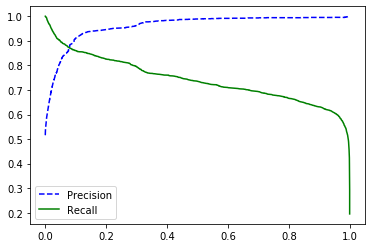

In [231]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [238]:
recall_score(y_test,y_test_nn)

0.8317962231005709

In [153]:
df_test


array([[-0.33149102,  0.3465487 ,  0.68916296, ..., -0.47981008,
         1.07699829, -1.25362   ],
       [-0.33149102,  1.26588593,  1.28412657, ..., -2.66223712,
        -0.99497464,  0.06944597],
       [-0.33149102,  0.60921648,  0.55694882, ..., -0.47981008,
        -1.66261037,  0.06944597],
       ...,
       [-0.33149102,  0.08388092,  0.16030642, ..., -0.47981008,
        -0.23525123,  0.06944597],
       [-0.33149102, -0.2444538 , -0.10412185, ...,  0.2476656 ,
        -0.23525123,  0.06944597],
       [-0.33149102, -1.36079186, -1.36015614, ..., -0.47981008,
        -0.99497464,  0.06944597]])

In [234]:
datadict={'INCIDENT_ID':test_inident_id,'MULTIPLE_OFFENSE':y_nn_Pred[:,0]}

In [235]:
upload=pd.DataFrame(data=datadict)

In [224]:
upload

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
...,...,...
15898,CR_44468,1
15899,CR_158460,1
15900,CR_115946,1
15901,CR_137663,1


In [237]:
upload.to_csv("hacking_incidence_NN1.csv",index=False)